<a href="https://colab.research.google.com/github/PeacefulSlice/NN2022/blob/master/NN2022LR4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота 4
## Neural Network Classification with TensorFlow
### Завдання
- На основі документу вирішити завдання класифікації для набору даних Fashion MNIST.
- Для моделювання використати 3 класи індекси яких взяти відповідно до номеру у списку групи.
- Моделювання провести із використанням нейронної мережі (Flatten & Dense layers).
- Здійснити вибір оптимального кроку градієнтного алгоритму (learning_rate), а також побудову Confusion Matrix.
- Результати оформити у вигляді файлу з кодом для моделювання та візуалізації у форматі .ipynb
- Результати викласти у репозиторії GitHub (папка Lab4).

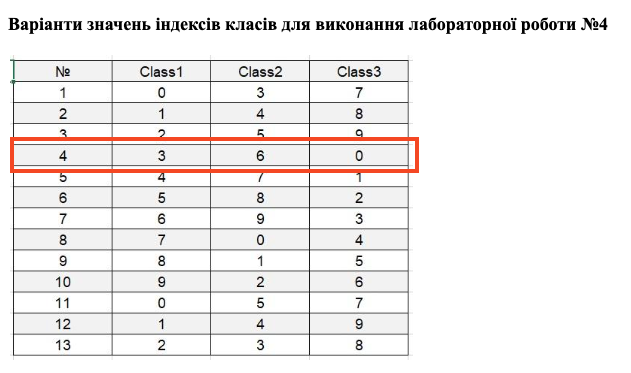

In [74]:
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

In [75]:
fashionMNIST = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashionMNIST.load_data()

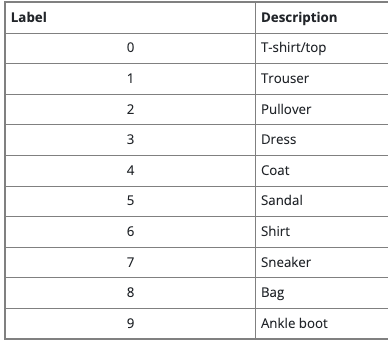

In [76]:
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)
classes = ['Dress','Shirt', 'T-shirt/top']
my_x_train, my_y_train, my_x_test, my_y_test = [],[],[],[]

In [77]:
# filling my train and test lists` (4th variant)
for i in range(len(y_train)):
  if (y_train[i] in [3,6,0]):
    my_x_train.append(x_train[i])
    my_y_train.append(y_train[i])

for i in range(len(y_test)):
  if (y_test[i] in [3,6,0]):
    my_x_test.append(x_test[i])
    my_y_test.append(y_test[i])

len(my_x_train),len(my_x_test)

(18000, 3000)

In [78]:
my_x_train, my_y_train, my_x_test, my_y_test = np.array(my_x_train), np.array(my_y_train), np.array(my_x_test), np.array(my_y_test)

Normalizing by 255 division cause of the pixel values range(0-255)

In [79]:
my_x_train =my_x_train/255.0
my_x_test =my_x_test/255.0


Epoch 1/40
563/563 [==============================] - 2s 3ms/step - loss: 0.7586 - accuracy: 0.7409 - val_loss: 0.4624 - val_accuracy: 0.8197 - lr: 0.0010
Epoch 2/40
563/563 [==============================] - 1s 2ms/step - loss: 0.4075 - accuracy: 0.8395 - val_loss: 0.4306 - val_accuracy: 0.8367 - lr: 0.0011
Epoch 3/40
563/563 [==============================] - 1s 2ms/step - loss: 0.3882 - accuracy: 0.8486 - val_loss: 0.4211 - val_accuracy: 0.8393 - lr: 0.0013
Epoch 4/40
563/563 [==============================] - 1s 2ms/step - loss: 0.3798 - accuracy: 0.8537 - val_loss: 0.4165 - val_accuracy: 0.8440 - lr: 0.0014
Epoch 5/40
563/563 [==============================] - 1s 2ms/step - loss: 0.3717 - accuracy: 0.8567 - val_loss: 0.4170 - val_accuracy: 0.8437 - lr: 0.0016
Epoch 6/40
563/563 [==============================] - 1s 2ms/step - loss: 0.3688 - accuracy: 0.8566 - val_loss: 0.4214 - val_accuracy: 0.8423 - lr: 0.0018
Epoch 7/40
563/563 [==============================] - 1s 2ms/step - lo

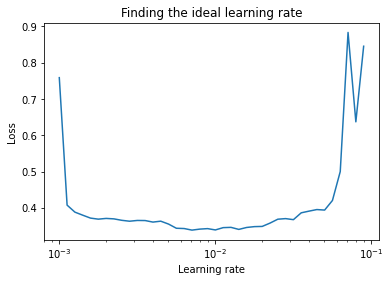

In [80]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 *10**(epoch/20))

find_lr_history = model.fit(my_x_train,
                    my_y_train,
                    epochs=40,
                    validation_data=(my_x_test, my_y_test),
                    callbacks=[lr_scheduler])

lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) 
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

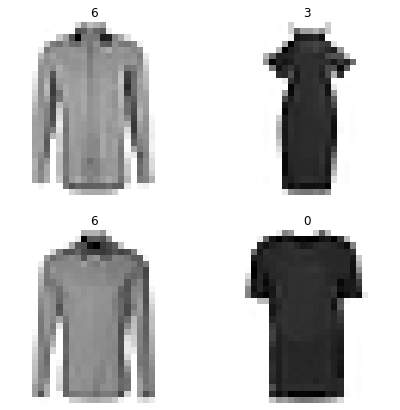

In [81]:
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(my_x_train)))
  plt.imshow(my_x_train[rand_index], cmap=plt.cm.binary)
  plt.title(my_y_train[rand_index])
  plt.axis(False)

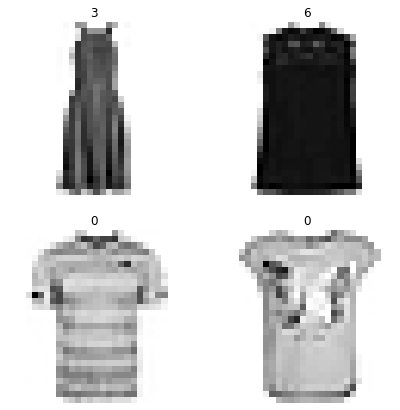

In [82]:
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(my_x_test)))
  plt.imshow(my_x_test[rand_index], cmap=plt.cm.binary)
  plt.title(my_y_test[rand_index])
  plt.axis(False)

94/94 [==============================] - 0s 2ms/step - loss: 0.7888 - accuracy: 0.6127


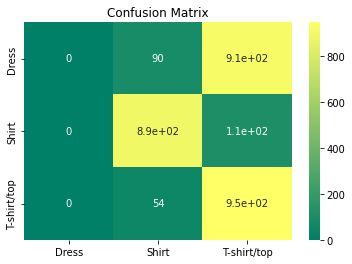

In [83]:


test_loss, test_acc = model.evaluate(my_x_test, my_y_test)


predictions = model.predict(my_x_test)
y_predictions = []
for i in predictions:
  i_max = np.argmax(i)
  y_predictions = np.append(y_predictions, i_max)

cm = confusion_matrix(my_y_test, y_predictions)
dataframe_cm = pd.DataFrame(cm, index = classes, columns = classes)

sns.heatmap(dataframe_cm, annot=True, cmap="summer")
plt.title('Confusion Matrix')


plt.show()